In [395]:
#import libraries
import os
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import joblib

%matplotlib inline

import pandas_profiling


from scipy.stats import skew, norm
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV, ElasticNet, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, classification_report, accuracy_score
from math import sqrt

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt



from lightgbm import LGBMRegressor
import lightgbm as lgb

np.random.seed(0)

In [396]:
#import data
current_path = os.getcwd()
current_path = os.path.dirname(current_path)
print(current_path)
#C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone\data_mart
dataset = current_path + '//data_mart//reporting_cb.csv'
cities = current_path + '//data_mart//facts_cities_metrics.csv'
college = current_path + '//data_mart//facts_college_metrics.csv'

dimc_file = current_path + '//data_mart//dimensions_cities.csv'
dimco_file = current_path + '//data_mart//dimensions_colleges.csv'
dimp_file = current_path + '//data_mart//dimensions_players.csv'




print(dataset)
city_dim = pd.read_csv(dimc_file)
college_dim = pd.read_csv(dimco_file)
player_dim = pd.read_csv(dimp_file)

dataset = pd.read_csv(dataset)
college_df = pd.read_csv(college)
city_df = pd.read_csv(cities)


#https://stackoverflow.com/questions/9856683/using-pythons-os-path-how-do-i-go-up-one-directory

C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone
C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone//data_mart//reporting_cb.csv


In [397]:
for x in dataset.columns:
    print(x)
    #print(dataset[x].describe)
    #print('-----')

fms_id
espn_id
full_name
first_name
last_name
position
position_group
section
college
draft_year
selection_number
position_rank
position_group_rank
section_rank
drafting_team
home_city
home_state
home_country
college_weight_pounds
college_height_inches
hw_ratio
forty
vertical
bench
broad
threecone
shuttle
defense_ast_tackles_pg
defense_fum_forced_pg
defense_fum_rec_pg
defense_fum_tds_pg
defense_fum_yds_pg
defense_int_pg
defense_int_td_pg
defense_int_yards_pg
defense_loss_tackles_pg
defense_pd_pg
defense_sacks_pg
defense_solo_tackes_pg
defense_tackles_pg
defense_ast_tackles_pg_cf_scaled
defense_fum_forced_pg_cf_scaled
defense_fum_rec_pg_cf_scaled
defense_fum_tds_pg_cf_scaled
defense_fum_yds_pg_cf_scaled
defense_int_pg_cf_scaled
defense_int_td_pg_cf_scaled
defense_int_yards_pg_cf_scaled
defense_loss_tackles_pg_cf_scaled
defense_pd_pg_cf_scaled
defense_sacks_pg_cf_scaled
defense_solo_tackes_pg_cf_scaled
defense_tackles_pg_cf_scaled
football_spending
coaches_salaries
ticket_sales
ann_rain_

In [398]:
#determine which columns have None values
none_columns = []
for x in dataset.columns:
    if dataset[x].isnull().values.any() == True:
        none_columns.append(x)
none_dict={}
for x in none_columns:
    none_dict[x] = 0
print(none_dict)

{'espn_id': 0, 'selection_number': 0, 'position_rank': 0, 'position_group_rank': 0, 'section_rank': 0, 'drafting_team': 0, 'home_city': 0, 'home_state': 0, 'home_country': 0, 'forty': 0, 'vertical': 0, 'bench': 0, 'broad': 0, 'threecone': 0, 'shuttle': 0, 'defense_ast_tackles_pg': 0, 'defense_fum_forced_pg': 0, 'defense_fum_rec_pg': 0, 'defense_fum_tds_pg': 0, 'defense_fum_yds_pg': 0, 'defense_int_pg': 0, 'defense_int_td_pg': 0, 'defense_int_yards_pg': 0, 'defense_loss_tackles_pg': 0, 'defense_pd_pg': 0, 'defense_sacks_pg': 0, 'defense_solo_tackes_pg': 0, 'defense_tackles_pg': 0, 'defense_ast_tackles_pg_cf_scaled': 0, 'defense_fum_forced_pg_cf_scaled': 0, 'defense_fum_rec_pg_cf_scaled': 0, 'defense_fum_tds_pg_cf_scaled': 0, 'defense_fum_yds_pg_cf_scaled': 0, 'defense_int_pg_cf_scaled': 0, 'defense_int_td_pg_cf_scaled': 0, 'defense_int_yards_pg_cf_scaled': 0, 'defense_loss_tackles_pg_cf_scaled': 0, 'defense_pd_pg_cf_scaled': 0, 'defense_sacks_pg_cf_scaled': 0, 'defense_solo_tackes_pg_cf

In [399]:
#Deal with specialized None Values

none_dict['espn_id'] = 0 
none_dict['conference'] =  'non_power_five'
none_dict['selection_number'] = 400
none_dict['position_rank'] = 400
none_dict['position_group_rank'] = 400
none_dict['section_rank'] = 400
none_dict['drafting_team'] = 'No Team'
none_dict['home_city'] = 'No City'
none_dict['home_state'] = 'No State'
none_dict['home_country'] = 'USA'
none_dict['forty'] = dataset['forty'].mean()
none_dict['vertical'] = dataset['vertical'].mean() 
none_dict['bench'] = dataset['bench'].mean()
none_dict['broad'] = dataset['broad'].mean()
none_dict['threecone'] = dataset['threecone'].mean()
none_dict['shuttle'] = dataset['shuttle'].mean()
none_dict['football_spending'] = dataset['football_spending'].mean() 
none_dict['coaches_salaries'] = dataset['coaches_salaries'].mean() 
none_dict['ticket_sales'] = dataset['ticket_sales'].mean()
#none_dict['poverty_pct'] = dataset['poverty_pct'].mean() 
#none_dict['med_income'] = dataset['med_income'].mean()
none_dict['max_madden'] = dataset['max_madden'].min() - 10       
none_dict['cb_max_madden_zscore'] = dataset['cb_max_madden_zscore'].min() - 0.1
    

print(none_dict)

for none_col in none_columns:
    dataset[none_col] = dataset[none_col].fillna(none_dict[none_col])
   

#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

{'espn_id': 0, 'selection_number': 400, 'position_rank': 400, 'position_group_rank': 400, 'section_rank': 400, 'drafting_team': 'No Team', 'home_city': 'No City', 'home_state': 'No State', 'home_country': 'USA', 'forty': 4.4951782363977495, 'vertical': 35.96924829157175, 'bench': 14.471563981042655, 'broad': 121.83333333333333, 'threecone': 6.931631419939577, 'shuttle': 4.157719298245614, 'defense_ast_tackles_pg': 0, 'defense_fum_forced_pg': 0, 'defense_fum_rec_pg': 0, 'defense_fum_tds_pg': 0, 'defense_fum_yds_pg': 0, 'defense_int_pg': 0, 'defense_int_td_pg': 0, 'defense_int_yards_pg': 0, 'defense_loss_tackles_pg': 0, 'defense_pd_pg': 0, 'defense_sacks_pg': 0, 'defense_solo_tackes_pg': 0, 'defense_tackles_pg': 0, 'defense_ast_tackles_pg_cf_scaled': 0, 'defense_fum_forced_pg_cf_scaled': 0, 'defense_fum_rec_pg_cf_scaled': 0, 'defense_fum_tds_pg_cf_scaled': 0, 'defense_fum_yds_pg_cf_scaled': 0, 'defense_int_pg_cf_scaled': 0, 'defense_int_td_pg_cf_scaled': 0, 'defense_int_yards_pg_cf_scale

In [400]:
#create categories for Madden Scores
def f(row):
    if row['max_madden'] >= 90 : val = 90
    elif row['max_madden'] < 90 and row['max_madden'] >= 80 : val = 80
    elif row['max_madden'] < 80 and row['max_madden'] >= 70 : val = 70  
    elif row['max_madden'] < 70 and row['max_madden'] >= 60 : val = 60
    elif row['max_madden'] < 60 and row['max_madden'] >= 50 : val = 50
    elif row['max_madden'] < 50 and row['max_madden'] >= 40 : val = 40
    else: val = 40
    return val
dataset['madden_cat'] = dataset.apply(f, axis=1)





"""

def f_avg_min(row):
    avg_min = (row['min_jan'] + row['min_feb'] + row['min_mar'] + row['min_apr'] + row['min_may'] + row['min_jun'] + row['min_jul'] + row['min_aug'] + row['min_sep'] + row['min_oct'] + row['min_nov'] + row['min_dec'])/12
    return avg_min

def f_avg_max(row):
    avg_max = (row['max_jan'] + row['max_feb'] + row['max_mar'] + row['max_apr'] + row['max_may'] + row['max_jun'] + row['max_jul'] + row['max_aug'] + row['max_sep'] + row['max_oct'] + row['max_nov'] + row['max_dec'])/12
    return avg_max

dataset['avg_min'] = dataset.apply(f_avg_min, axis=1)


dataset['avg_max'] = dataset.apply(f_avg_max, axis=1)
"""





"\n\ndef f_avg_min(row):\n    avg_min = (row['min_jan'] + row['min_feb'] + row['min_mar'] + row['min_apr'] + row['min_may'] + row['min_jun'] + row['min_jul'] + row['min_aug'] + row['min_sep'] + row['min_oct'] + row['min_nov'] + row['min_dec'])/12\n    return avg_min\n\ndef f_avg_max(row):\n    avg_max = (row['max_jan'] + row['max_feb'] + row['max_mar'] + row['max_apr'] + row['max_may'] + row['max_jun'] + row['max_jul'] + row['max_aug'] + row['max_sep'] + row['max_oct'] + row['max_nov'] + row['max_dec'])/12\n    return avg_max\n\ndataset['avg_min'] = dataset.apply(f_avg_min, axis=1)\n\n\ndataset['avg_max'] = dataset.apply(f_avg_max, axis=1)\n"

In [401]:
####REMOVE ALL NO MADDEN SCORES thru 2014 and keep all NO MADDEN SCORES 2015 forward
#determine % of no madden scores wanted
no_madden_percentage = .25

no_madden_df = dataset.loc[dataset['madden_cat'] == 40]
madden_df = dataset.loc[dataset['madden_cat'] != 40]

print(no_madden_df.shape)
print(madden_df.shape)

current_no_madden_percentage = no_madden_df.shape[0] / dataset.shape[0] - no_madden_percentage
print(current_no_madden_percentage)

for x in set(dataset['draft_year'].values):
    if x in [2015, 2016, 2017, 2018, 2019]:
        year_df = no_madden_df.loc[dataset['draft_year'] == x]
        madden_df = madden_df.append(year_df)


dataset = madden_df
print(dataset.shape)
dataset.head()
dataset = shuffle(dataset)
dataset.head()

#https://stackoverflow.com/questions/28556942/pandas-remove-rows-at-random-without-shuffling-dataset

(172, 149)
(370, 149)
0.0673431734317343
(391, 149)


,fms_id,espn_id,full_name,first_name,last_name,position,position_group,section,college,draft_year,...,cb_max_jun_zscore,cb_max_jul_zscore,cb_max_aug_zscore,cb_max_sep_zscore,cb_max_oct_zscore,cb_max_nov_zscore,cb_max_dec_zscore,cb_max_madden_zscore,max_madden,madden_cat
65,3848,545758.0,Parry Nickerson,Parry,Nickerson,CB,DB,D,Tulane,2018,...,0.264171,0.014415,0.132299,0.550351,0.771538,0.852440,0.877933,-0.551038,70.0,70
143,1644,0.0,Doran Grant,Doran,Grant,CB,DB,D,Ohio State,2015,...,-0.214923,-0.402005,-0.492386,-0.455913,-0.624252,-0.672946,-0.793789,-0.873130,67.0,60
436,642,3921563.0,Bryant McFadden,Bryant,McFadden,CB,DB,D,Florida State,2005,...,1.085476,0.748107,0.738054,1.103796,1.219728,1.191415,1.166161,0.415237,79.0,70
198,4608,0.0,Terrance Mitchell,Terrance,Mitchell,CB,DB,D,Oregon,2014,...,-1.960195,-1.195186,-0.908842,-0.824876,-0.982804,-0.882313,-0.456151,0.415237,79.0,70
325,154,0.0,Alphonso Smith,Alphonso,Smith,CB,DB,D,Wake Forest,2009,...,0.058845,0.054074,-0.227368,-0.321745,-0.137646,0.064822,-0.003221,-0.014218,75.0,70


In [402]:
dataset.columns[70:]

Index(['max_jan', 'max_feb', 'max_mar', 'max_apr', 'max_may', 'max_jun',
       'max_jul', 'max_aug', 'max_sep', 'max_oct', 'max_nov', 'max_dec',
       'cb_college_weight_pounds_zscore', 'cb_college_height_inches_zscore',
       'cb_hw_ratio_zscore', 'cb_forty_zscore', 'cb_vertical_zscore',
       'cb_bench_zscore', 'cb_broad_zscore', 'cb_threecone_zscore',
       'cb_shuttle_zscore', 'cb_defense_ast_tackles_pg_zscore',
       'cb_defense_fum_forced_pg_zscore', 'cb_defense_fum_rec_pg_zscore',
       'cb_defense_fum_tds_pg_zscore', 'cb_defense_fum_yds_pg_zscore',
       'cb_defense_int_pg_zscore', 'cb_defense_int_td_pg_zscore',
       'cb_defense_int_yards_pg_zscore', 'cb_defense_loss_tackles_pg_zscore',
       'cb_defense_pd_pg_zscore', 'cb_defense_sacks_pg_zscore',
       'cb_defense_solo_tackes_pg_zscore', 'cb_defense_tackles_pg_zscore',
       'cb_defense_ast_tackles_pg_cf_scaled_zscore',
       'cb_defense_fum_forced_pg_cf_scaled_zscore',
       'cb_defense_fum_rec_pg_cf_scaled_zs

In [403]:

#Total Features
"""['espn_id', 'fms_college_id', 'fms_city_id', 'full_name',
       'first_name', 'last_name', 'position', 'position_group', 'section',
       'college', 'conference', 'draft_year', 'selection_number',
       'position_rank', 'position_group_rank', 'section_rank', 'drafting_team',
       'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'defense_ast_tackles_pg', 'defense_fum_forced_pg',
       'defense_fum_rec_pg', 'defense_fum_tds_pg', 'defense_fum_yds_pg',
       'defense_int_pg', 'defense_int_td_pg', 'defense_int_yards_pg',
       'defense_loss_tackles_pg', 'defense_pd_pg', 'defense_sacks_pg',
       'defense_solo_tackes_pg', 'defense_tackles_pg',
       'defense_ast_tackles_pg_cf_scaled', 'defense_fum_forced_pg_cf_scaled',
       'defense_fum_rec_pg_cf_scaled', 'defense_fum_tds_pg_cf_scaled',
       'defense_fum_yds_pg_cf_scaled', 'defense_int_pg_cf_scaled',
       'defense_int_td_pg_cf_scaled', 'defense_int_yards_pg_cf_scaled',
       'defense_loss_tackles_pg_cf_scaled', 'defense_pd_pg_cf_scaled',
       'defense_sacks_pg_cf_scaled', 'defense_solo_tackes_pg_cf_scaled',
       'defense_tackles_pg_cf_scaled', 'football_spending', 'coaches_salaries',
       'ticket_sales', 'ann_rain_inch', 'ann_snow_inch', 'min_jan', 'min_feb',
       'min_mar', 'min_apr', 'min_may', 'min_jun', 'min_jul', 'min_aug',
       'min_sep', 'min_oct', 'min_nov', 'min_dec',
       
       'max_jan', 'max_feb', 'max_mar', 'max_apr', 'max_may', 'max_jun',
       'max_jul', 'max_aug', 'max_sep', 'max_oct', 'max_nov', 'max_dec',
       'cb_college_weight_pounds_zscore', 'cb_college_height_inches_zscore',
       'cb_hw_ratio_zscore', 'cb_forty_zscore', 'cb_vertical_zscore',
       'cb_bench_zscore', 'cb_broad_zscore', 'cb_threecone_zscore',
       'cb_shuttle_zscore', 'cb_defense_ast_tackles_pg_zscore',
       'cb_defense_fum_forced_pg_zscore', 'cb_defense_fum_rec_pg_zscore',
       'cb_defense_fum_tds_pg_zscore', 'cb_defense_fum_yds_pg_zscore',
       'cb_defense_int_pg_zscore', 'cb_defense_int_td_pg_zscore',
       'cb_defense_int_yards_pg_zscore', 'cb_defense_loss_tackles_pg_zscore',
       'cb_defense_pd_pg_zscore', 'cb_defense_sacks_pg_zscore',
       'cb_defense_solo_tackes_pg_zscore', 'cb_defense_tackles_pg_zscore',
   'cb_defense_ast_tackles_pg_cf_scaled_zscore',
   'cb_defense_fum_forced_pg_cf_scaled_zscore',
   'cb_defense_fum_rec_pg_cf_scaled_zscore',
   'cb_defense_fum_tds_pg_cf_scaled_zscore',
   'cb_defense_fum_yds_pg_cf_scaled_zscore',
   'cb_defense_int_pg_cf_scaled_zscore',
   'cb_defense_int_td_pg_cf_scaled_zscore',
   'cb_defense_int_yards_pg_cf_scaled_zscore',
   'cb_defense_loss_tackles_pg_cf_scaled_zscore',
   'cb_defense_pd_pg_cf_scaled_zscore',
   'cb_defense_sacks_pg_cf_scaled_zscore',
   'cb_defense_solo_tackes_pg_cf_scaled_zscore',
   'cb_defense_tackles_pg_cf_scaled_zscore', 
       'cb_football_spending_zscore',
       'cb_coaches_salaries_zscore', 'cb_ticket_sales_zscore',
       'cb_ann_rain_inch_zscore', 'cb_ann_snow_inch_zscore',
       'cb_min_jan_zscore', 'cb_min_feb_zscore', 'cb_min_mar_zscore',
       'cb_min_apr_zscore', 'cb_min_may_zscore', 'cb_min_jun_zscore',
       'cb_min_jul_zscore', 'cb_min_aug_zscore', 'cb_min_sep_zscore',
       'cb_min_oct_zscore', 'cb_min_nov_zscore', 'cb_min_dec_zscore',
       'cb_max_jan_zscore', 'cb_max_feb_zscore', 'cb_max_mar_zscore',
       'cb_max_apr_zscore', 'cb_max_may_zscore', 'cb_max_jun_zscore',
       'cb_max_jul_zscore', 'cb_max_aug_zscore', 'cb_max_sep_zscore',
       'cb_max_oct_zscore', 'cb_max_nov_zscore', 'cb_max_dec_zscore', 'max_madden']"""

features = ['college_weight_pounds', 'college_height_inches', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'ann_rain_inch', 'ann_snow_inch',
       'min_jan', 'min_feb',
       'min_mar', 'min_apr', 'min_may', 'min_jun', 'min_jul', 'min_aug',
       'min_sep', 'min_oct', 'min_nov', 'min_dec', 'max_jan', 'max_feb',
       'max_mar', 'max_apr', 'max_may', 'max_jun', 'max_jul', 'max_aug',
       'max_sep', 'max_oct', 'max_nov', 'max_dec']

z_features = ['cb_hw_ratio_zscore',
       'cb_college_height_inches_zscore',
       'cb_forty_zscore', 'cb_vertical_zscore',
       'cb_broad_zscore', 'cb_threecone_zscore',
       'cb_shuttle_zscore', 
       'cb_defense_ast_tackles_pg_cf_scaled_zscore',
       'cb_defense_fum_forced_pg_cf_scaled_zscore',
       'cb_defense_int_pg_cf_scaled_zscore',
       'cb_defense_int_td_pg_cf_scaled_zscore',
       'cb_defense_int_yards_pg_cf_scaled_zscore',
       'cb_defense_loss_tackles_pg_cf_scaled_zscore',
       'cb_defense_pd_pg_cf_scaled_zscore',
       'cb_defense_solo_tackes_pg_cf_scaled_zscore',
       'cb_defense_tackles_pg_cf_scaled_zscore',
       'cb_ann_rain_inch_zscore'     
       
         ]


"""
0.5
z_features = ['cb_college_weight_pounds_zscore', 'cb_college_height_inches_zscore',
       'cb_forty_zscore', 'cb_vertical_zscore',
       'cb_bench_zscore', 'cb_broad_zscore', 'cb_threecone_zscore',
       'cb_shuttle_zscore', 
       'cb_defense_ast_tackles_pg_cf_scaled_zscore',
       'cb_defense_fum_forced_pg_cf_scaled_zscore',
       'cb_defense_int_pg_cf_scaled_zscore',
       'cb_defense_int_td_pg_cf_scaled_zscore',
       'cb_defense_int_yards_pg_cf_scaled_zscore',
       'cb_defense_loss_tackles_pg_cf_scaled_zscore',
       'cb_defense_pd_pg_cf_scaled_zscore',
       'cb_defense_solo_tackes_pg_cf_scaled_zscore',
       'cb_defense_tackles_pg_cf_scaled_zscore',
       'cb_ann_rain_inch_zscore'

"""

"\n0.5\nz_features = ['cb_college_weight_pounds_zscore', 'cb_college_height_inches_zscore',\n       'cb_forty_zscore', 'cb_vertical_zscore',\n       'cb_bench_zscore', 'cb_broad_zscore', 'cb_threecone_zscore',\n       'cb_shuttle_zscore', \n       'cb_defense_ast_tackles_pg_cf_scaled_zscore',\n       'cb_defense_fum_forced_pg_cf_scaled_zscore',\n       'cb_defense_int_pg_cf_scaled_zscore',\n       'cb_defense_int_td_pg_cf_scaled_zscore',\n       'cb_defense_int_yards_pg_cf_scaled_zscore',\n       'cb_defense_loss_tackles_pg_cf_scaled_zscore',\n       'cb_defense_pd_pg_cf_scaled_zscore',\n       'cb_defense_solo_tackes_pg_cf_scaled_zscore',\n       'cb_defense_tackles_pg_cf_scaled_zscore',\n       'cb_ann_rain_inch_zscore'\n\n"

#Create by game by conference per game stats
def game_avg(row):
    stats_list = ['rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td', 'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds']
    if row['rushing_games'] == 0:
        pass
    else:
        for stat in stats_list:
            
#{'acc', 'big_10', 'big_12', 'mountain_west', 'non_power_five', 'pac_12', 'sec'}
            if   row['conference'] == 'sec':  row[stat] = row[stat]/row['rushing_games'] * 1
            elif row['conference'] == 'acc':  row[stat] = row[stat]/row['rushing_games'] * .9
            elif row['conference'] == 'big_10':  row[stat] = row[stat]/row['rushing_games'] * .9
            elif row['conference'] == 'big_12':  row[stat] = row[stat]/row['rushing_games'] * .8
            elif row['conference'] == 'pac_12':  row[stat] = row[stat]/row['rushing_games'] * .8
            elif row['conference'] == 'mountain_west':  row[stat] = row[stat]/row['rushing_games'] * .75
            elif row['conference'] == 'non_power_five':  row[stat] = row[stat]/row['rushing_games'] * .6
        
            
            
    return row


#use by game stats?
game_averages = 'Y'
if game_averages == 'Y':
    dataset = dataset.apply(game_avg, axis=1)
else: pass

df_list = []
mean_list = []
std_list = []
col_list = []
for col in dataset[features].columns:
    col_list.append(col)
    mean_list.append(dataset[col].mean())
    std_list.append(dataset[col].std())
df_list.append(mean_list)
df_list.append(std_list)

df_mean_std = pd.DataFrame(df_list, columns=col_list, index = ['mean', 'std'])
df_mean_std.to_csv('rb_mean_std_features.csv')

In [404]:
#select year to hold out
holdout_year = 2015
#pick features from above
features_list = z_features




#z_score features
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden'].values)

#for col in dataset[features_list].columns:
#    dataset[col] = stats.zscore(dataset[col].values)



#prediction feature
#prediction_feature = 'max_madden'
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden_zscore'].values)
#max_mean = dataset['max_madden'].mean()
#max_std = dataset['max_madden'].std()
#prediction_feature = 'max_madden'

prediction_feature = 'madden_cat'
features_list.append(prediction_feature)






#create a train and test df based on the hold out year
test_basis = 'hold_out'
if test_basis == 'hold_out':
    test_df = dataset.loc[dataset['draft_year'] == holdout_year]
    train_df = dataset.loc[dataset['draft_year'] != holdout_year]

if test_basis != 'hold_out':
    dataset = shuffle(dataset)
    split= .9
    train_df = dataset[:int(dataset.shape[0]*split)]
    test_df = dataset[int(dataset.shape[0]*split):]


#shuffle the dataset
test_df = shuffle(test_df)
train_df = shuffle(train_df)

#create a copy of the dataset with that feature set
test_df_feat = test_df[features_list].copy()
train_df_feat = train_df[features_list].copy()

In [405]:
X_train, Y_train = train_df_feat[:].drop([prediction_feature], axis =1), train_df_feat.pop(prediction_feature)
X_validation, Y_validation = test_df_feat[:].drop([prediction_feature], axis =1), test_df_feat.pop(prediction_feature)

In [406]:
   # Plot feature importance
def plot_feat_import(coef, model_title):
    feature_coef = pd.Series(index=X_train.columns, data=coef)
    print('{} model picked {} out of {} features'.format(model_title, str(sum(feature_coef != 0)), str(X_train.shape[1])))
    top_bottom_10 = pd.concat([feature_coef.sort_values().head(10), feature_coef.sort_values().tail(10)])
    #top_bottom_10 = feature_coef.sort_values()
    top_bottom_10.plot(kind='barh', title='Feature importance (Top and bottom 10) - {} model'.format(model_title))
    #from W207 project (Fleishman, Hilton, Niu)
    
def print_results(true_val, predict_val):
    print('Accuracy:  ' + str(accuracy_score(true_val, predict_val)))
    print('R2 : ' + str(r2_score(true_val, predict_val)))
    print('MSE : ' + str(mean_squared_error(true_val, predict_val)))
    

def plot_confusion(mat, model):
    
    array = mat
    df_cm = pd.DataFrame(array, index = [i for i in class_names],
                      columns = [i for i in class_names])
    plt.figure(figsize = (10,7))
    plt.title(model)
    sn.heatmap(df_cm, annot=True, cmap="Blues")


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    
    
class_names = sorted(list(set(dataset[prediction_feature].values)))

In [407]:
sorted(list(set(dataset[prediction_feature].values)))

[40, 50, 60, 70, 80, 90]

In [408]:
result_df = test_df[['full_name', prediction_feature, 'position_group_rank']].copy()
print(result_df)
def result_df_viz(df, predictions, model_name):
    
    df[model_name] = predictions
    
    return df

            full_name  madden_cat  position_group_rank
146   Ifo Ekpre-Olomu          70                 32.0
161   Quinten Rollins          70                 10.0
137       Byron Jones          90                  4.0
140      D'Joun Smith          60                 12.0
138    Charles Gaines          60                 27.0
164     Steven Nelson          80                 16.0
136      Bobby McCain          70                 23.0
154     Kevin Johnson          80                  2.0
158     Nick Marshall          60                 50.0
150         Josh Shaw          70                 20.0
151     Julian Wilson          40                 44.0
162      Ronald Darby          80                  8.0
143       Doran Grant          60                 21.0
156      Lorenzo Doss          70                 24.0
153        Justin Cox          40                 46.0
135       Alex Carter          60                 14.0
166         Troy Hill          70                 52.0
155       

Accuracy:  0.46875
R2 : 0.1754874651810585
MSE : 115.625
AdaBoostRegressor model picked 17 out of 17 features
Index(['AdaBoost'], dtype='object')


































,full_name,AdaBoost,madden_cat,position_group_rank
146,Ifo Ekpre-Olomu,70.0,70,32.0
159,P.J. Williams,70.0,70,13.0
139,Craig Mager,70.0,70,15.0
160,Quandre Diggs,70.0,80,30.0
163,Senquez Golson,70.0,70,9.0
152,Justin Coleman,70.0,80,45.0
144,Eric Rowe,70.0,70,7.0
165,Trae Waynes,70.0,80,1.0
161,Quinten Rollins,70.0,70,10.0
135,Alex Carter,70.0,60,14.0


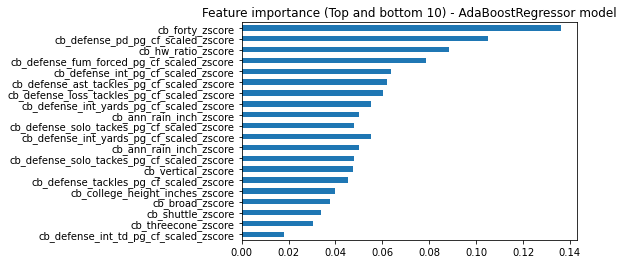

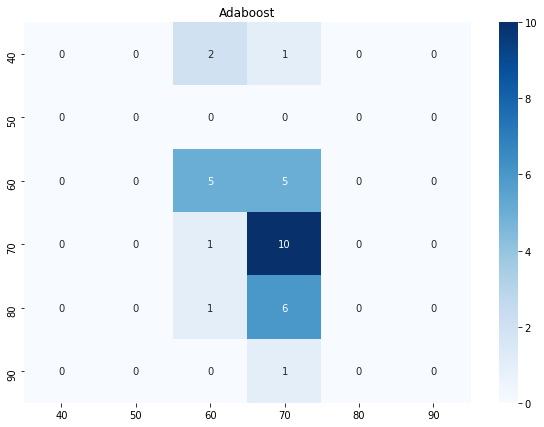

In [409]:
#Adaboost
adaboostregressor = AdaBoostRegressor(DecisionTreeRegressor(criterion='mse'), n_estimators=100, loss='linear', learning_rate=1, random_state=1)
adaboostregressor.fit(X_train, Y_train)
madden_predict = adaboostregressor.predict(X_validation)

print_results(Y_validation, madden_predict)
plot_feat_import(adaboostregressor.feature_importances_, 'AdaBoostRegressor')
mat = confusion_matrix(Y_validation, madden_predict, labels = class_names)

plot_confusion(mat, 'Adaboost')
result_df_viz(result_df, madden_predict, 'AdaBoost')
from scipy.stats import rankdata
print(result_df.columns[3:])
rank_df = result_df[result_df.columns[3:]]

def rank(row):
    print()
    return row.sum()/len(row)
result_df['rank'] = rank_df.apply(rank, axis=1)
ordered_df = result_df[['full_name', 'AdaBoost', prediction_feature, 'position_group_rank']].sort_values(by=['AdaBoost'], ascending=False)
ordered_df



In [131]:
ordered_df.to_csv('cb_rank_of_picks.csv')
file_name = 'cb_model.pkl'
joblib.dump(adaboostregressor, file_name)



#https://www.kaggle.com/prmohanty/python-how-to-save-and-load-ml-models

['cb_model.pkl']

In [378]:
feature_coef = pd.Series(index=X_validation.columns, data=adaboostregressor.feature_importances_)
feature_coef  = feature_coef.sort_values(ascending=False)
print(feature_coef.index)
feature_coef.to_csv('cb_feature_importances.csv')

Index(['cb_forty_zscore', 'cb_defense_pd_pg_cf_scaled_zscore',
       'cb_defense_fum_forced_pg_cf_scaled_zscore', 'cb_hw_ratio_zscore',
       'cb_defense_loss_tackles_pg_cf_scaled_zscore',
       'cb_defense_int_pg_cf_scaled_zscore',
       'cb_defense_ast_tackles_pg_cf_scaled_zscore', 'cb_vertical_zscore',
       'cb_ann_rain_inch_zscore', 'cb_college_weight_pounds_zscore',
       'cb_broad_zscore', 'cb_defense_solo_tackes_pg_cf_scaled_zscore',
       'cb_defense_tackles_pg_cf_scaled_zscore',
       'cb_defense_int_yards_pg_cf_scaled_zscore', 'cb_threecone_zscore',
       'cb_shuttle_zscore', 'cb_college_height_inches_zscore',
       'cb_bench_zscore', 'cb_defense_int_td_pg_cf_scaled_zscore'],
      dtype='object')
